In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import matplotlib as mpl

mpl.rcParams['xtick.major.pad'] = 1
mpl.rcParams['ytick.major.pad'] = 1

mpl.rcParams['xtick.major.size'] = 2  # Major tick length for x-axis
mpl.rcParams['xtick.minor.size'] = 0.5   # Minor tick length for x-axis
mpl.rcParams['ytick.major.size'] = 2  # Major tick length for y-axis
mpl.rcParams['ytick.minor.size'] = 0.5   # Minor tick length for y-axis

mpl.rcParams['xtick.major.width'] = 0.375  # Major tick width for x-axis
mpl.rcParams['ytick.major.width'] = 0.375  # Major tick width for y-axis
mpl.rcParams['xtick.minor.width'] = 0.375  # Major tick width for x-axis
mpl.rcParams['ytick.minor.width'] = 0.375  # Major tick width for y-axis


	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.375

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


# Generating data

All memory profiling here done by running:

    starling MDVFMKGLSKAKEGVVAAAEKTKQGVAEAAGKTKEGVLYVGSKTKEGVVHGVATVAEKTKEQVTNVGGAVVTGVTAVAQKTVEGAGSIAAATGFVKKDQLGKNEEGAPQEGILEDMPVDPDNEAYEMPSEEGYQDYEPEA -c 2500 -b <BATCH_SIZE>

and then after several  batches have completed using

    nvidia-smi

To get at memory usage. We think this is the best way to accurately assess memory usage.


In [58]:
# load the data
memuse = np.loadtxt('memory_prof.csv',delimiter=',')

In [59]:
memuse.transpose()[1]

array([15750., 15604., 14872., 14142., 15418., 14994., 14568., 14146.,
       13720., 13296., 12870., 12444., 12022., 11598., 15764., 15516.,
       15148., 14528., 13342., 12106., 11488., 16062., 15908., 15744.,
       15406., 14608., 13726., 12108., 10496.,  7088.,  5510.,  3944.,
        3148.,  2592.,  2444.])

/var/folders/2n/xtzsyspd32v6vglg_pd5gmw80000gn/T/ipykernel_30477/1429182400.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "sk" (-> color='k'). The keyword argument will take precedence.
  plt.plot(memuse.transpose()[0], memuse.transpose()[1]/1000,'sk',mew=0.3, color='b',mec='k', ms=3)


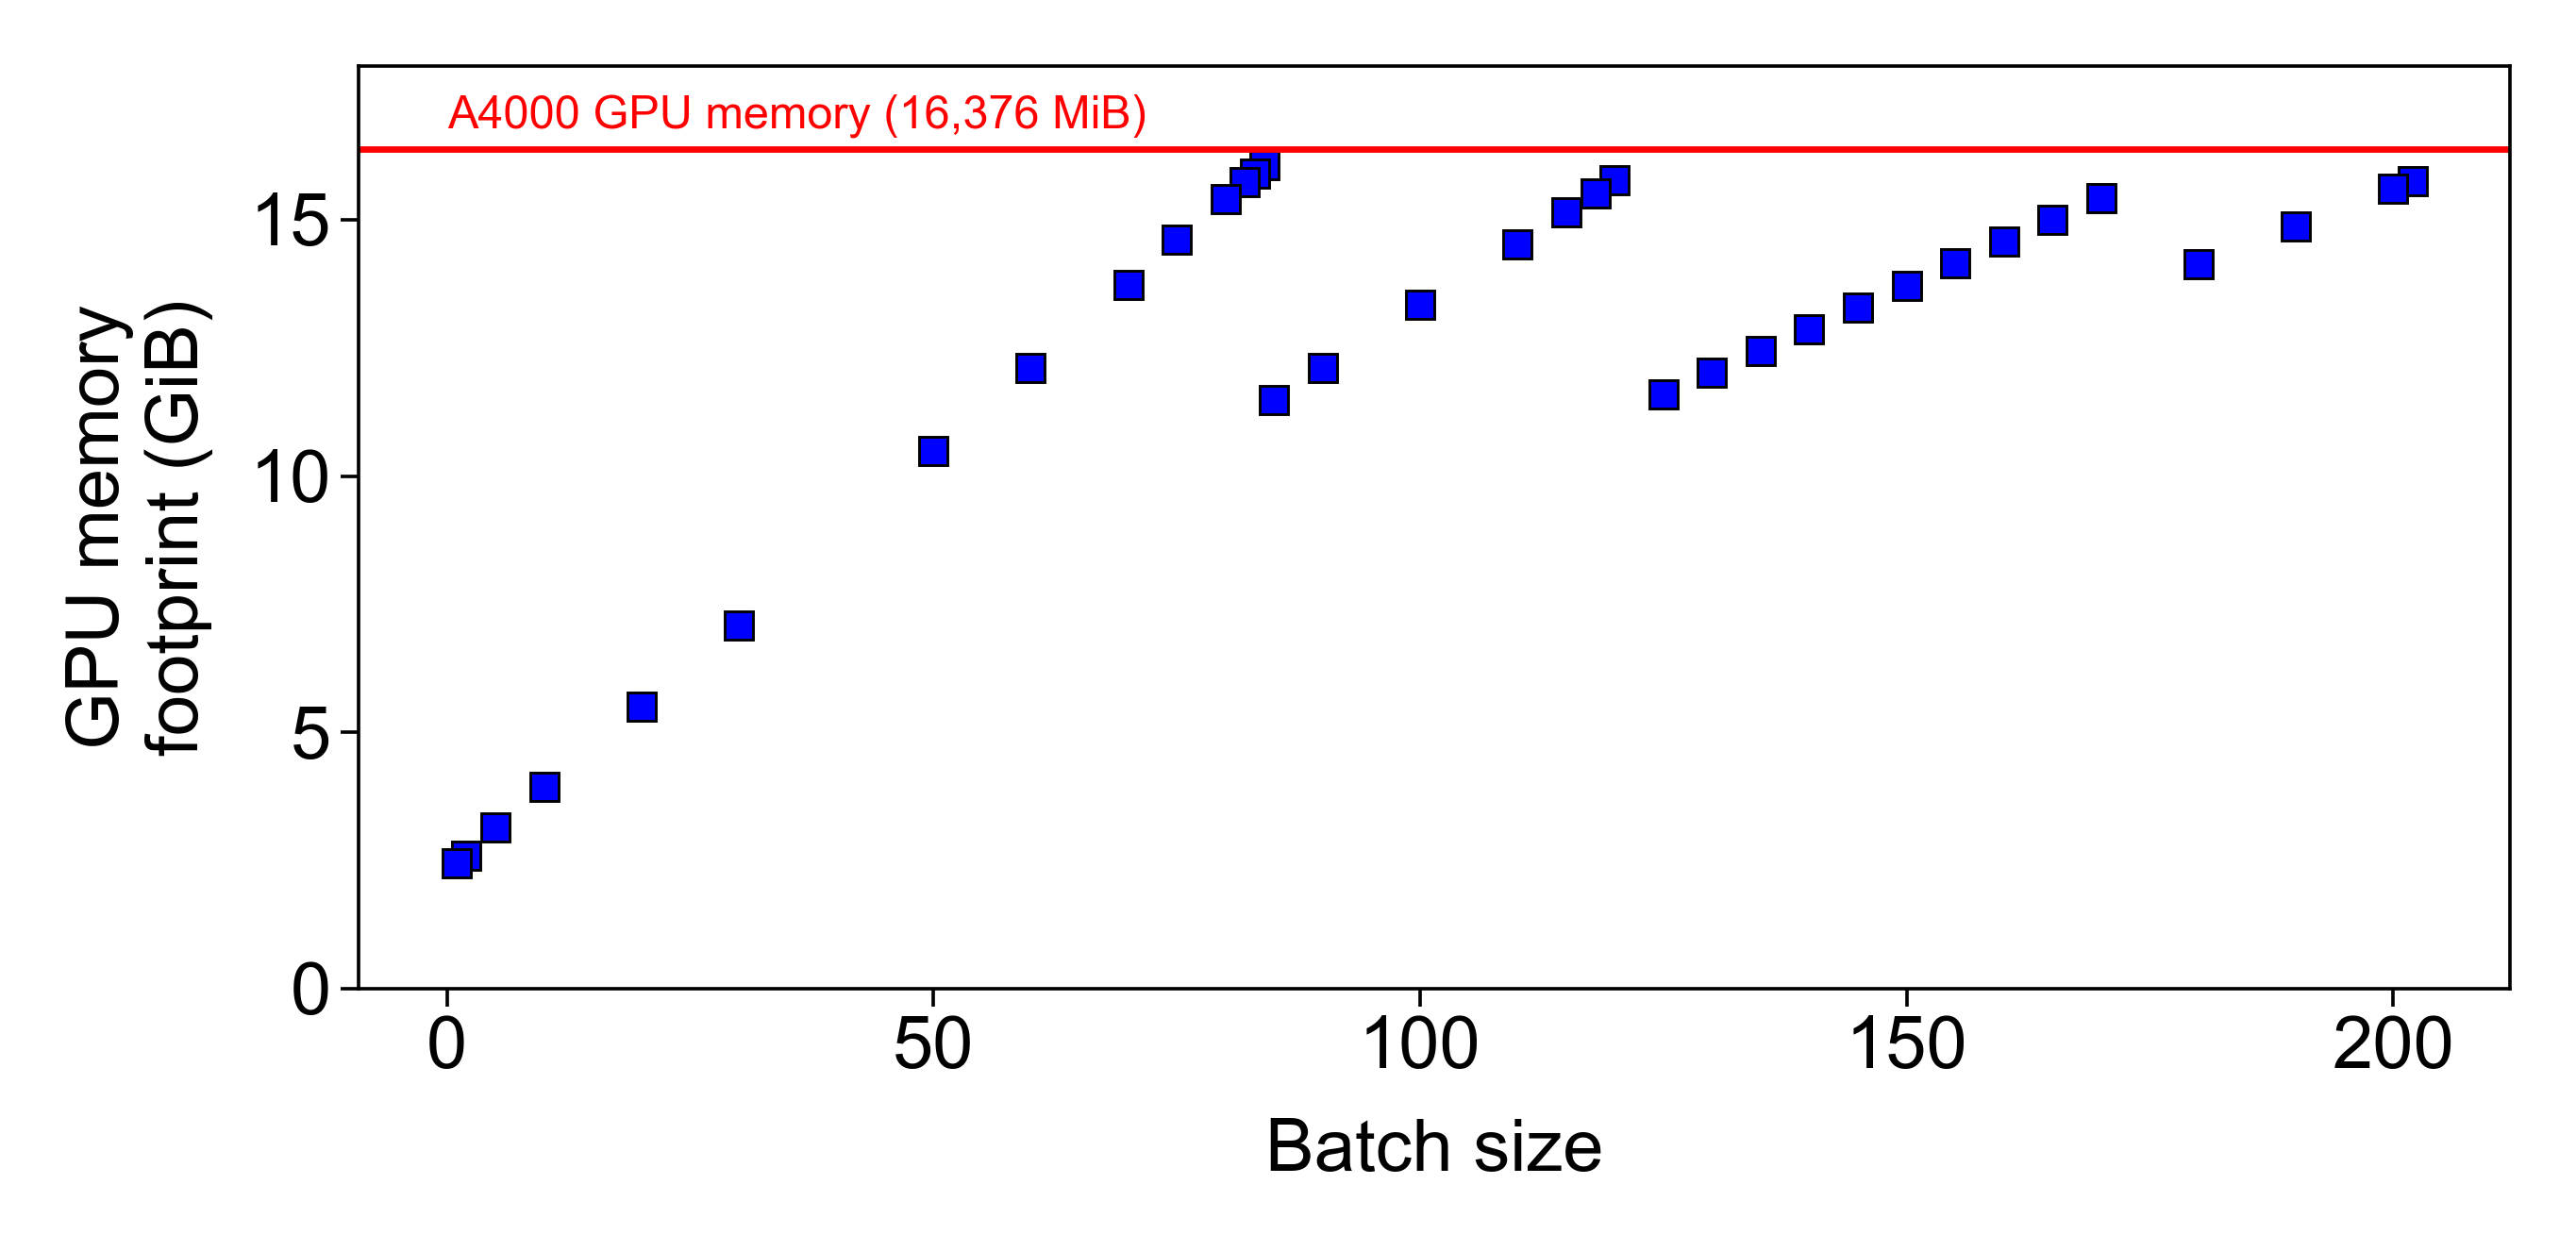

In [57]:
figure(None, (4,2), dpi=350)

ax = plt.gca()

plt.plot(memuse.transpose()[0], memuse.transpose()[1]/1000,'sk',mew=0.3, color='b',mec='k', ms=3)
ax.axhline(16.376, color='r',lw=0.7)
plt.xlabel('Batch size', fontsize=8)
plt.ylabel('GPU memory\nfootprint (GiB)', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim([0,18])
plt.text(0, 16.800, 'A4000 GPU memory (16,376 MiB)', fontsize=5, color='r')
plt.tight_layout()
plt.savefig('memory_footprint_A4000.pdf')